# **Predicting Customer Churn** 

 ## Introduction

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

 ## Business Understanding

 ### *Explanation of Features* 

 Data Dictionary
   - Customer ID; nique customer code
   - Gender; sex of the customer
   - Senior Citizen; age of the customer
   - Partner; marital status of the customer
   - Dependants; if the customer has dependants 
   - Tenure; number of years as a customer
   - Phone Service 
   - Multiple Lines
   - Internet Service
   - Online Security
   - Online Backup 
   - Device Protection
   - Tech Support
   - Streaming TV
   - Streaming Movies
   - Contract
   - Paperless Billing
   - Payment Method
   - Monthly Charges
   - Total Charges
   - Churn


  ### *Hypothesis - Contract period*

 **Null Hypothesis** - The contract type has no significant on the level of attrition

 **Alternate Hypothesis** - The contract type has significant impact on the level of attrition

###  *Analytical Questions*
1. What are the key factors affecting customer churn?
2. How does customer tenure affect the likelihood of churn?
3. Which demographic factors influence customer churn?
4. Does the contract period affect customer churn?
5. Does the type of Internet Service affect customer churn?

## Data Understanding

### Importation

In [731]:
#import necessary packages
import pyodbc 
import os    
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings 
warnings.filterwarnings('ignore')

### Load Datasets

In [641]:
#Create a connection by accessing your connection string with your defined environment variables

# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

Python-dotenv could not parse statement starting at line 5


In [642]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server 

connection = pyodbc.connect(connection_string)

In [643]:
# Use the sql query to get the data  

query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [644]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [645]:
#load csv datasets
data2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data3 = pd.read_csv('Telco-churn-second-2000.csv')

In [646]:
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [647]:
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Exploratory Data Analysis (EDA)

#### Explore the data

In [648]:
#check the data type and get more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [649]:
#check the number of observations(rows) and features(columns) in the dataset
data.shape

(3000, 21)

In [650]:
#check for missing values in the dataset
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [651]:
#view the percentage of missing values in each column
(data.isnull().sum()/(len(data)))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.966667
InternetService      0.000000
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.166667
Churn                0.033333
dtype: float64

Online Security, Online Backup, Device Protection, Tech Support, Streaming TV and Streaming Movies columns have 21.7% missing values followed by Total Charges column with 0.17% missing values and finally Churn columns with 0.03% missing values

In [652]:
#check for duplicates in the dataset
data.duplicated().sum()

0

There are no missing values in the first dataset

#### Summary Statistics

In [653]:
#perform summary statistics on the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


- The average tenure is 32.5 months with a range of 0 - 72 months which shows there are new customers and loyal customers in the data
- The average monthly charge is 65.34 with a range of 18.40 - 118.65
- The average total charge is 2,301.28 with a range of 18.80 - 8,564.75


In [654]:
#include objects in the summary statistics
data.describe(include = 'object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


- The male customers are more than female customers with a frequency of 137
- Most customers do not use multiple lines
- The most common internet service is Fibre Optic
- The most common contract is month-to-month
- The most popular payment method is Electronic check

#### Inspecting Columns

In [655]:
data['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '1891-FZYSA',
       '4770-UEZOX', '1A1:U3001038-RQOST'], dtype=object)

In [656]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [657]:
data['SeniorCitizen'].unique()

array([False,  True])

In [658]:
data['Partner'].unique()

array([ True, False])

In [659]:
data['Dependents'].unique()

array([False,  True])

In [660]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [661]:
data['PhoneService'].unique()

array([False,  True])

In [662]:
data['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [663]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [664]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [665]:
data['PaperlessBilling'].unique()

array([ True, False])

In [666]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [667]:
data['MonthlyCharges'].unique()

array([29.85000038, 56.95000076, 53.84999847, ..., 33.90000153,
       34.        , 38.59999847])

In [668]:
data['TotalCharges'].unique()

array([  29.85000038, 1889.5       ,  108.15000153, ..., 6143.14990234,
        144.80000305,  414.95001221])

In [669]:
data['Churn'].unique()

array([False, True, None], dtype=object)

In [670]:
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [671]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [672]:
data2.shape

(2043, 21)

In [673]:
data2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the second dataset

In [674]:
data2.duplicated().sum()

0

There are no missing values in the second dataset

In [675]:
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [676]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [677]:
data3.shape

(2000, 20)

In [678]:
data3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

There are no missing values in the dataset

In [679]:
data3.duplicated().sum()

0

There are no missing values in the dataset

#### Concatenate the datasets

In [680]:
#concatenate the datasets
df = pd.concat([data, data2, data3])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [681]:
#check the data type and get more info on the concatenated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6774 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    6392 non-null   object 
 10  OnlineBackup      6392 non-null   object 
 11  DeviceProtection  6392 non-null   object 
 12  TechSupport       6392 non-null   object 
 13  StreamingTV       6392 non-null   object 
 14  StreamingMovies   6392 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

In [682]:
#display the number of observations(rows) and features(columns) in the concatenated dataset
df.shape

(7043, 21)

In [683]:
#check for missing values in the concatenated dataset
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

In [684]:
#check for duplicates in the concatenated dataset
df.duplicated().sum()

0

In [685]:
#perform summary statistics on the concatenated dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.000000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.000000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.349998,89.85,118.75


In [686]:
#include objects in the summary statistics
df.describe(include = 'object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,4,No,2103
Dependents,7043,4,No,2863
PhoneService,7043,4,Yes,3630
MultipleLines,6774,5,No,1953
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,6392,5,No,2020
OnlineBackup,6392,5,No,1768
DeviceProtection,6392,5,No,1799


#### Dropping Columns

In [687]:
#I am going to drop the Total Charges column. I am making the assumption that the total charges column is a multiplication of the tenure and monthly charges colums.
#...That does however not reflect in the column hence why I am dropping it. I am also making the assumption that the tenure is in months and 0 means the client has been subscribed
#...for less than a month
#..The goal of dropping this row is also to get the correct datatype, it should be float not object
df = df.drop(['TotalCharges'], axis = 1)

In [688]:
#ascertaining that the Total Charges column is dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6774 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    6392 non-null   object 
 10  OnlineBackup      6392 non-null   object 
 11  DeviceProtection  6392 non-null   object 
 12  TechSupport       6392 non-null   object 
 13  StreamingTV       6392 non-null   object 
 14  StreamingMovies   6392 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

In [689]:
df['Churn'].unique()

array([False, True, None, 'No', 'Yes', nan], dtype=object)

In [690]:
df['Churn'].replace({'No':'False', 'Yes':'True'}, inplace = True)

In [691]:
df['Churn'].unique()

array([False, True, None, 'False', 'True', nan], dtype=object)

In [692]:
#I am going to create a new column called Total Charges that is going to be a multiplication of the tenure and monthly charges column
df['TotalCharges'] = np.where(df['tenure'] == 0, df['MonthlyCharges'], df['tenure'] * df['MonthlyCharges'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,False,29.850000
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,False,1936.300026
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,True,107.699997
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,False,1903.499966
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,True,141.399994


In [693]:
#Checking the datatype of the Total Charges column
df['TotalCharges'].unique()

array([  29.85000038, 1936.30002594,  107.69999695, ...,  525.7       ,
       3480.35      , 6866.5       ])

In [694]:
#checking to see the datatype especially for the total charges column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6774 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    6392 non-null   object 
 10  OnlineBackup      6392 non-null   object 
 11  DeviceProtection  6392 non-null   object 
 12  TechSupport       6392 non-null   object 
 13  StreamingTV       6392 non-null   object 
 14  StreamingMovies   6392 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

In [695]:
#group columns into categorical and numerical columns for easy analysis
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical Variables:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


#### Univariate Analysis

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

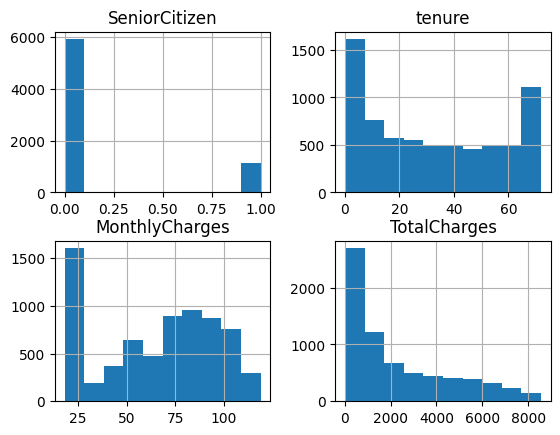

In [696]:
#visualize distribution and patterns of numerical data in the dataset
df.hist()

SeniorCitizen
Skew: 1.83


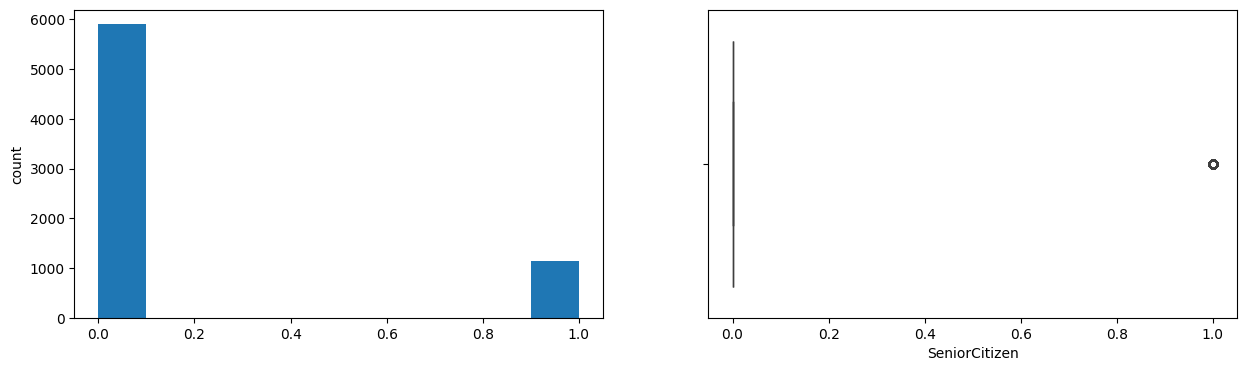

tenure
Skew: 0.24


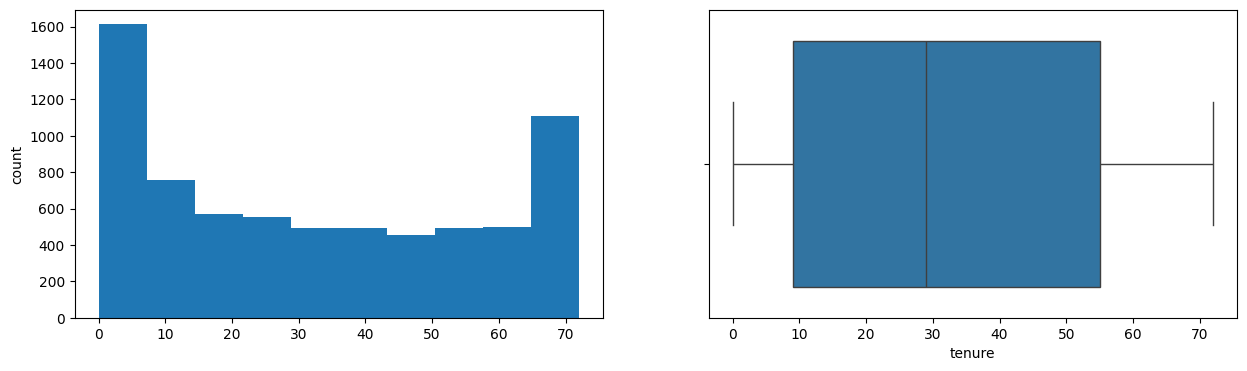

MonthlyCharges
Skew: -0.22


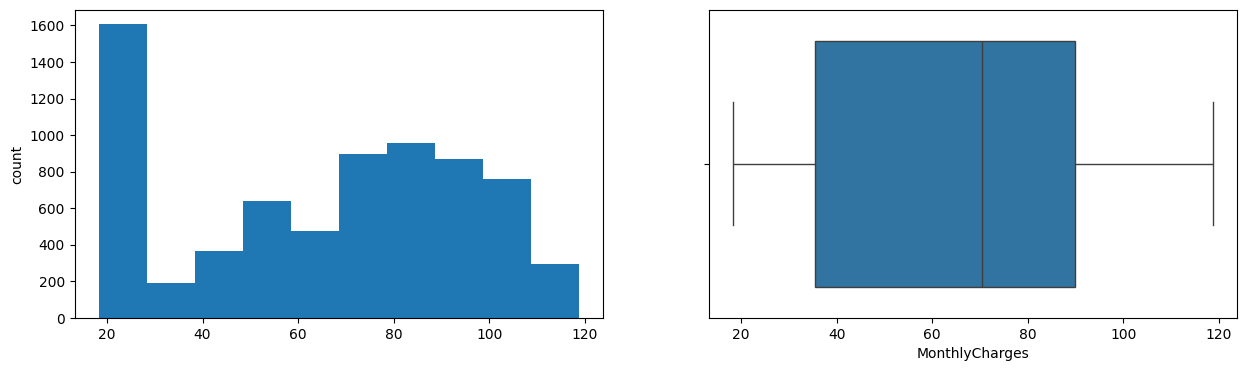

TotalCharges
Skew: 0.96


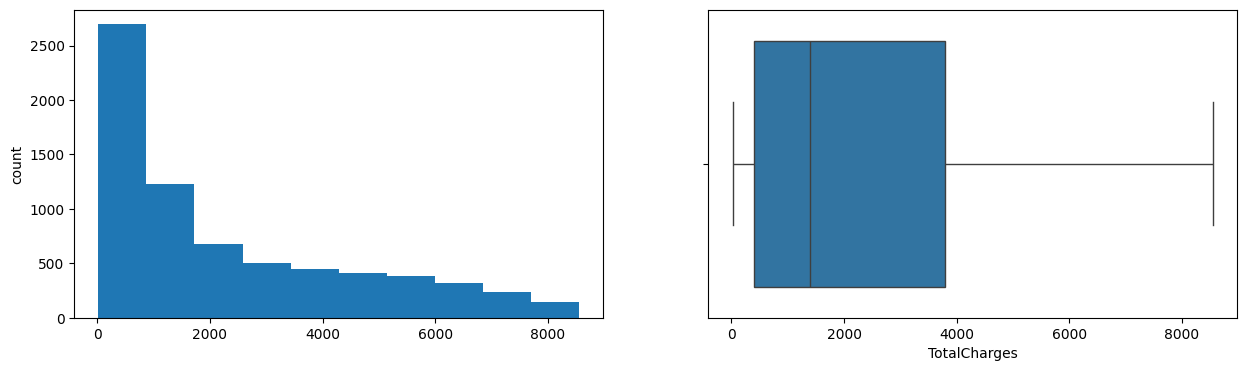

In [697]:
#visualize distribution and patterns of the numerical columns in the dataset
for col in num_cols:
    print(col)
    print('Skew:', round(float(df[col].skew()), 2))  # Convert skew result to float
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()


In [698]:
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
Churn               2001
TotalCharges           0
dtype: int64

### Answering Analysis Questions

#### 1. What are the key factors affecting customer churn?

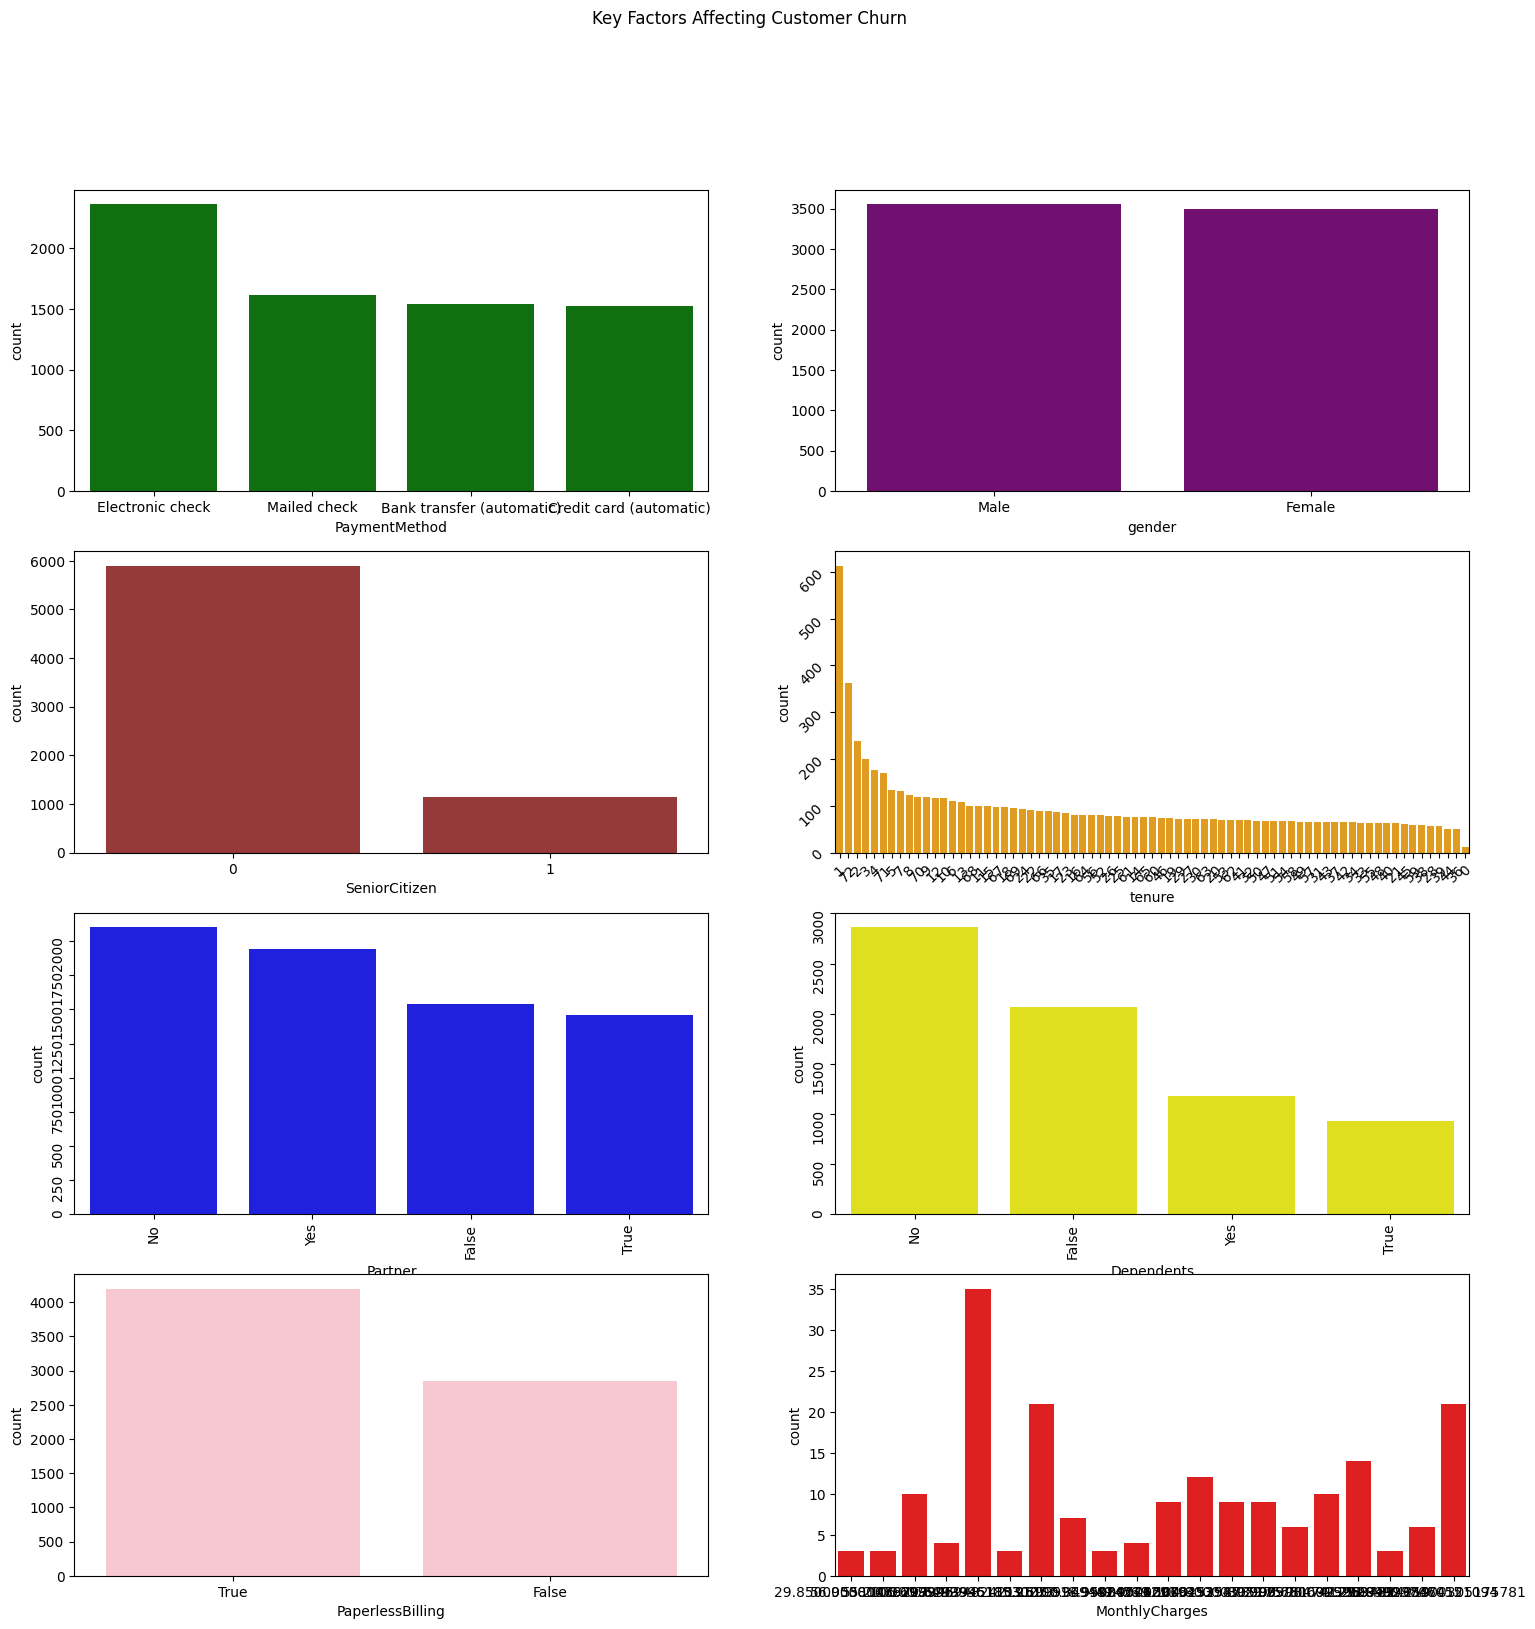

In [699]:
fig, axes = plt.subplots(4, 2, figsize = (18, 18))
fig.suptitle('Key Factors Affecting Customer Churn')
sns.countplot(ax = axes[0, 0], x = 'PaymentMethod', data = df, color = 'green', 
              order = df['PaymentMethod'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'gender', data = df, color = 'purple', 
              order = df['gender'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'SeniorCitizen', data = df, color = 'brown', 
              order = df['SeniorCitizen'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'tenure', data = df, color = 'orange', 
              order = df['tenure'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Partner', data = df, color = 'blue', 
              order = df['Partner'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Dependents', data = df, color = 'yellow', 
              order = df['Dependents'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'PaperlessBilling', data = df, color = 'pink', 
              order = df['PaperlessBilling'].head(20).value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'MonthlyCharges', data = df, color = 'red', 
              order = df['MonthlyCharges'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

### Bivariate Analysis

2. How does customer tenure affect the likelihood of churn?

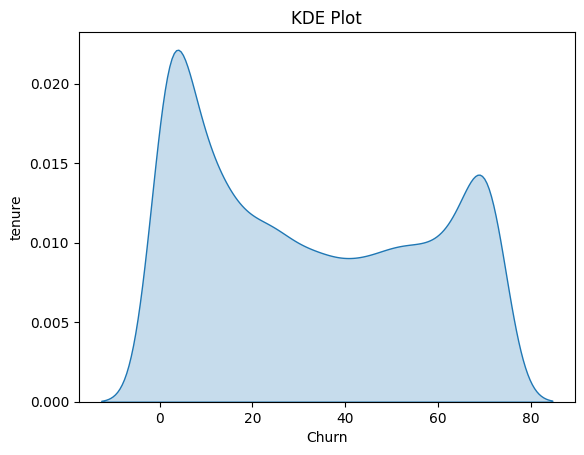

In [726]:
sns.kdeplot(data=df['tenure'], shade=True)

plt.xlabel('Churn')
plt.ylabel('tenure')
plt.title('KDE Plot')
plt.show()

3. Which demographic factors influence customer churn?

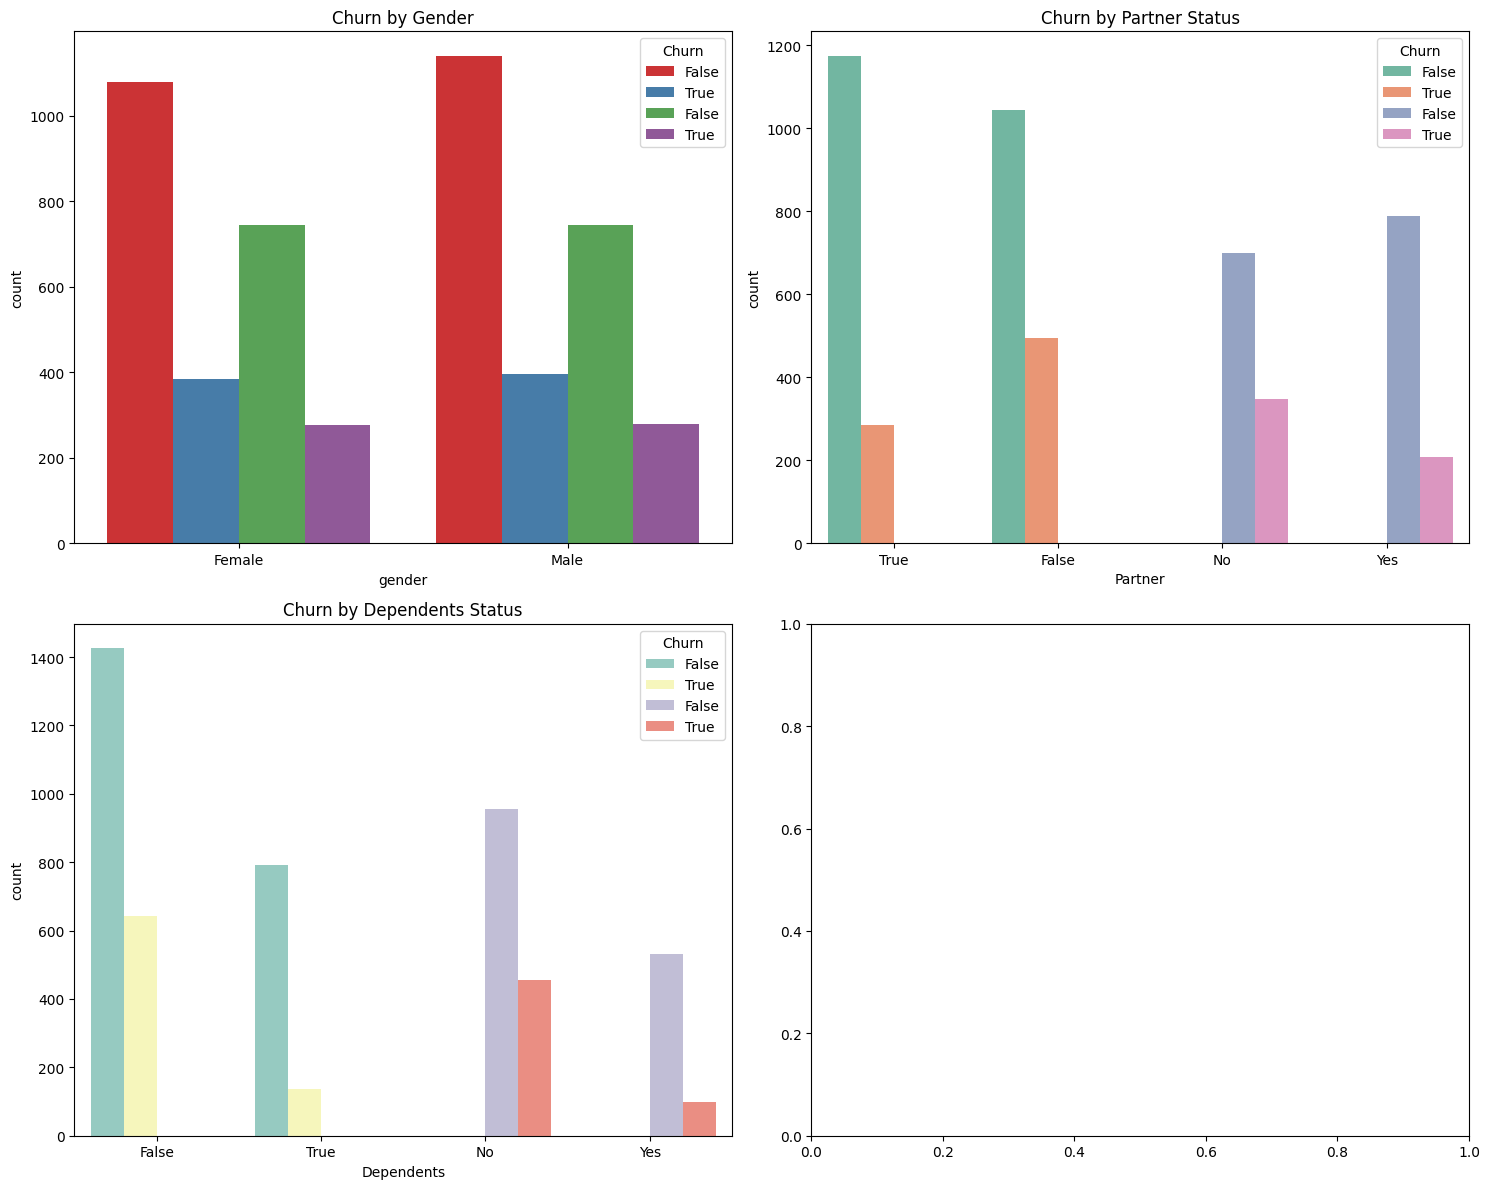

In [701]:
#the demographic factors from the dataset are gender and whether or not the client has a partner and/or dependant so I'll visualize that using a bar plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.countplot(ax=axes[0, 0], x='gender', hue='Churn', data=df, palette='Set1')
axes[0, 0].set_title('Churn by Gender')

sns.countplot(ax=axes[0, 1], x='Partner', hue='Churn', data=df, palette='Set2')
axes[0, 1].set_title('Churn by Partner Status')

sns.countplot(ax=axes[1, 0], x='Dependents', hue='Churn', data=df, palette='Set3')
axes[1, 0].set_title('Churn by Dependents Status')

# Add more categorical variables as needed

plt.tight_layout()
plt.show()


4. Does the contract period affect customer churn?

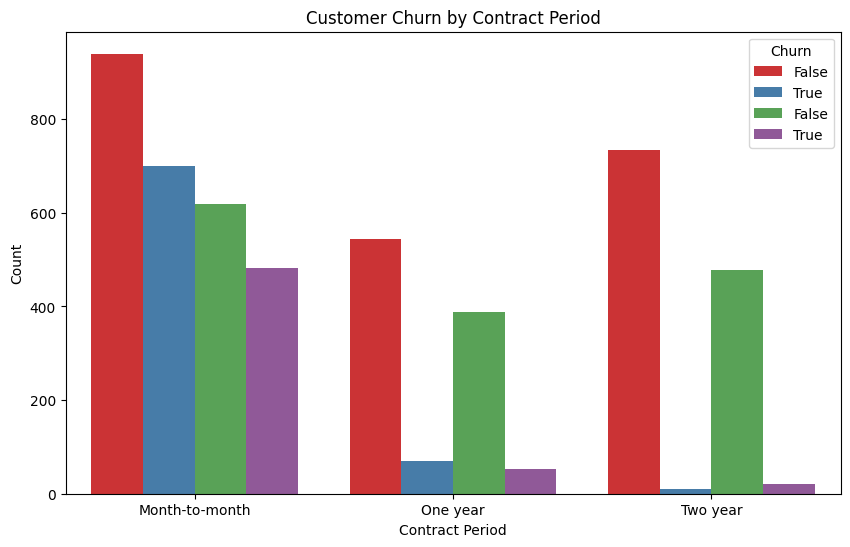

In [702]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Customer Churn by Contract Period')
plt.xlabel('Contract Period')
plt.ylabel('Count')
plt.show()


5. Does the type of Internet Service affect customer churn?

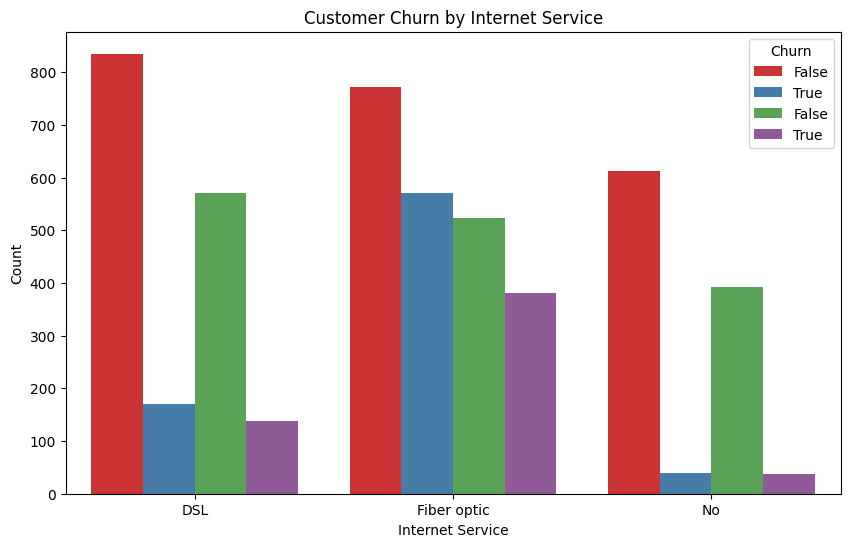

In [706]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set1')
plt.title('Customer Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()


### Hypothesis Testing

In [732]:
contingency_table = pd.crosstab(df['Churn'], df['Contract'])

# Perform Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

#  results
if p < alpha:
    print("Reject the null hypothesis. The contract type has no significant on the level of attrition.")
else:
    print("Fail to reject the null hypothesis. The contract type has significant impact on the level of attrition.")

Reject the null hypothesis. The contract type has no significant on the level of attrition.


### Conclusion

Based on the analysis and the Chi-Square Test for Independence, we reject the null hypothesis, indicating a significant relationship between customer attrition and the type of contract. The count plot illustrates a higher number of customers leaving the company, particularly among those with a Month-to-Month contract. This suggests that contract terms play a crucial role in customer retention. To enhance customer retention strategies, the marketing department should consider tailoring promotional efforts or loyalty programs to address the needs and preferences associated with different contract types. Specifically, for those with a Month-to-Month contract, they should put more effort into convincing them to consider other contract types, such as one year or two years. Additionally, targeted communication and incentives could be designed to encourage long-term commitment, thereby reducing the likelihood of churn within specific contract segments.